In [5]:
driver.close()

In [1]:
url = "http://www.riss.kr/search/Search.do?isDetailSearch=Y&searchGubun=true&viewYn=OP&queryText=znPublisher%2C%EC%97%B0%EC%84%B8%EB%8C%80%ED%95%99%EA%B5%90%40op%2CAND%40znMajor%2C%EC%82%AC%ED%9A%8C%ED%95%99%EA%B3%BC%40op%2CNOT%40znMajor%2C%EC%82%AC%ED%9A%8C%EB%B3%B5%EC%A7%80%ED%95%99%EA%B3%BC&strQuery=&exQuery=&exQueryText=&order=%2FDESC&onHanja=false&strSort=RANK&p_year1=&p_year2=&iStartCount=0&orderBy=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&ccl_code=&inside_outside=&fric_yn=&image_yn=&gubun=&kdc=&ttsUseYn=&l_sub_code=&fsearchMethod=search&sflag=1&isFDetailSearch=N&pageNumber=1&resultKeyword=&fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&icate=bib_t&colName=bib_t&pageScale=10&isTab=Y&regnm=&dorg_storage=&language=&language_code=&clickKeyword=&relationKeyword=&query="

keyword = {
    "etc":[],
    "1970":[],
    "1980":[],
    "1990":[],
    "2000":[],
    "2010":[],
    "2020":[]
}

kw = {
    "recent":[],
    "old":[]
}

In [2]:
number_of_texts = {
    "etc": 0,
    "1970": 0,
    "1980": 0,
    "1990": 0,
    "2000": 0,
    "2010": 0,
    "2020": 0
}

nt = {
    "recent": 0,
    "old": 0
}

In [3]:
from selenium import webdriver
driver = webdriver.Chrome(executable_path=r"C:\sele\chromedriver.exe")

driver.get(url)

C:\Users\Autumn\AppData\Local\Temp\ipykernel_5860\94304089.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"C:\sele\chromedriver.exe")


In [4]:
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import time

In [5]:

#divContent > div > div.rightContent.wd756 > div > div.srchResultW > div.srchResultListW > ul > li:nth-child(2) > div.cont.ml60 > p.title
count = 3
a = 0
whole_count = 0
while(count != 0):
    

    for j in range(1,11):
        try:
            # 논문 페이지 접근 
            element = driver.find_element(By.XPATH, f'//*[@id="divContent"]/div/div[2]/div/div[2]/div[2]/ul/li[{j}]/div[2]/p[1]/a')
            element.click()

            # 페이지 접근해서 source code 가져오기 
            html = driver.page_source
            finder = BeautifulSoup(html, 'lxml')
            
            # 주제어 태그 가져오기 
            checker = finder.find('div', attrs={"id":"thesisInfoDiv"}).find('div', attrs={'class':'infoDetail on'}).find('div', attrs={'infoDetailL'}).ul.find_all('li')[5].find_all('a', attrs={'class':'instituteInfo'})

            year = finder.select_one("#thesisInfoDiv > div.infoDetail.on > div.infoDetailL > ul > li:nth-child(4) > div > p")
            year = int(year.get_text())
            
            if year >= 2020:
                for i in range(len(checker)):
                    keyword["2020"].append(checker[i].text)
                    if i == 0:
                        number_of_texts["2020"] = number_of_texts["2020"] + 1

            elif year >= 2010:
                for i in range(len(checker)):
                    keyword["2010"].append(checker[i].text)
                    if i == 0:
                        number_of_texts["2010"] = number_of_texts["2010"] + 1

            elif year >= 2000:
                for i in range(len(checker)):
                    keyword["2000"].append(checker[i].text)
                    if i == 0:
                        number_of_texts["2000"] = number_of_texts["2000"] + 1

            elif year >= 1990:
                for i in range(len(checker)):
                    keyword["1990"].append(checker[i].text)
                    if i == 0:
                        number_of_texts["1990"] = number_of_texts["1990"] + 1

            elif year >= 1980:
                for i in range(len(checker)):
                    keyword["1980"].append(checker[i].text)
                    if i == 0:
                        number_of_texts["1980"] = number_of_texts["1980"] + 1

            elif year >= 1970:
                for i in range(len(checker)):
                    keyword["1970"].append(checker[i].text)
                    if i == 0:
                        number_of_texts["1970"] = number_of_texts["1970"] + 1
                    
            else:
                for i in range(len(checker)):
                    keyword["etc"].append(checker[i].text)
                    if i == 0:
                        number_of_texts["etc"] = number_of_texts["etc"] + 1

            if year >= 2013:
                for i in range(len(checker)):
                    kw["recent"].append(checker[i].text)
                    if i == 0:
                        nt["recent"] = nt["recent"] + 1
            elif year <= 2012:
                for i in range(len(checker)):
                    kw["old"].append(checker[i].text)
                    if i == 0:
                        nt["old"] = nt["old"] + 1
            # # 주제어 append 
            # for i in range(len(checker)):
            #     keyword.append(checker[i].text)

            whole_count = whole_count + 1
            time.sleep(1)
            driver.back()

            print(f"j: {j}")
        except: 
            driver.back()

    print()
    try:
        element = driver.find_element(By.XPATH, f'//*[@id="divContent"]/div/div[2]/div/div[3]/a[{count}]')
        element.click()
    except: 
        break
    if a == 0:
        if count == 12:
            count = 3
            a = 1

    if count == 13:
        count = 4
        ###### 30 개만 돌리기용
        # if a != 1:
        #     a = a + 1
        # else:
        #     break
        ######
    else:
        count = count + 1
    print(f"whole_count: {whole_count}")
    time.sleep(1)


j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 10
j: 1
j: 2
j: 3
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 19
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 29
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 39
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 49
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 59
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 69
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 79
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 89
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 99
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 109
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 119
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 129
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10

whole_count: 139
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 1

In [8]:
import pickle
# with open("list_ex.pkl","wb") as f:
#     pickle.dump(keyword, f)
# with open("list_ex.pkl","rb") as f:
#     list_ex_load = pickle.load(f)

with open('final.pkl', 'wb') as f:
    pickle.dump(keyword, f)
    
with open('final_text_num.pkl', 'wb') as f:
    pickle.dump(number_of_texts, f)

with open('final_whole_num.pkl', 'wb') as f:
    pickle.dump(whole_count, f)

with open('save_4.pkl', 'rb') as f:
    loaded = pickle.load(f)
# '//*[@id="divContent"]/div/div[2]/div/div[3]/a[3]'
# '//*[@id="divContent"]/div/div[2]/div/div[3]/a[4]'
# '//*[@id="divContent"]/div/div[2]/div/div[3]/a[2]'
# '//*[@id="divContent"]/div/div[2]/div/div[3]/a[12]'

# '//*[@id="divContent"]/div/div[2]/div/div[3]/a[3]'

In [11]:
with open("old_new.pkl", 'wb') as f:
    pickle.dump(kw, f)

with open("count_old_new.pkl", 'wb') as f:
    pickle.dump(nt, f)

In [7]:
temp = 0
for i in number_of_texts.values():
    temp = temp + i
    # print(type(i))

print(temp)

651


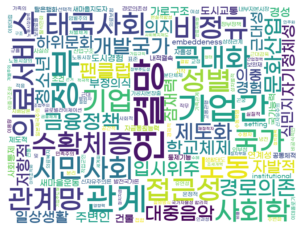

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

# FONT_PATH = 'C:/Windows/Fonts/MalangmalangB.ttf' # For Korean characters
FONT_PATH = r'C:\Users\Autumn\AppData\Local\Microsoft\Windows\Fonts\GmarketSansTTFMedium.ttf' # For Korean characters


noun_text = ' '.join(keyword["1990"])
    
wordcloud = WordCloud(max_font_size=100, width=800, height=600, font_path=FONT_PATH, background_color="white")
wordcloud.generate(noun_text) 
# generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('3_1990.png')

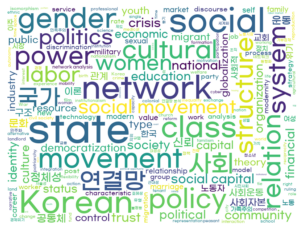

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = r'C:\Users\Autumn\AppData\Local\Microsoft\Windows\Fonts\GmarketSansTTFMedium.ttf' # For Korean characters


noun_text = ' '.join(keyword["2000"])
    
wordcloud = WordCloud(max_font_size=100, width=800, height=600, font_path=FONT_PATH, background_color="white")
wordcloud.generate(noun_text) 
# generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('3_2000.png')

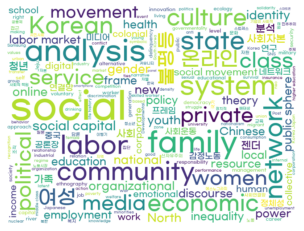

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = r'C:\Users\Autumn\AppData\Local\Microsoft\Windows\Fonts\GmarketSansTTFMedium.ttf' # For Korean characters


noun_text = ' '.join(keyword["2010"])
    
wordcloud = WordCloud(max_font_size=100, width=800, height=600, font_path=FONT_PATH, background_color="white")

wordcloud.generate(noun_text) 
# generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('3_2010.png')

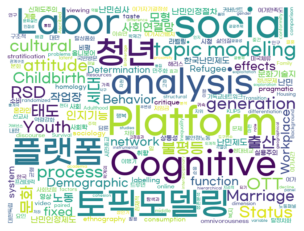

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = r'C:\Users\Autumn\AppData\Local\Microsoft\Windows\Fonts\GmarketSansTTFMedium.ttf' # For Korean characters


noun_text = ' '.join(keyword["2020"])
    
wordcloud = WordCloud(max_font_size=100, width=800, height=600, font_path=FONT_PATH, background_color="white")

wordcloud.generate(noun_text) 
# generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('3_2020.png')